<h10>Ce code montre plusieurs jeu de données pour les capteurs TESS-W et CGR-4 de la Station BSRN du laboratoire EnergyLab</h10>

<h3>Importation des librairies</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

In [16]:
df = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Data_TESS_CRG_03-05-2024.csv", delimiter=';')
df2 = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Data_TESS_CRG_04-05-2024.csv", delimiter=';')

In [17]:
dfnan = df.dropna()
df2nan = df2.dropna()
Date = df.set_index(df['hour'], inplace=True)
Date2 = df2.set_index(df2['hour'], inplace=True)
P_tsky = 5.670374*10**-8*(df['tsky']+273)**4
P_tskynan = 5.670374*10**-8*(dfnan['tsky']+273)**4
P_tsky2 = 5.670374*10**-8*(df2['tsky']+273)**4
P_tsky2nan = 5.670374*10**-8*(df2nan['tsky']+273)**4

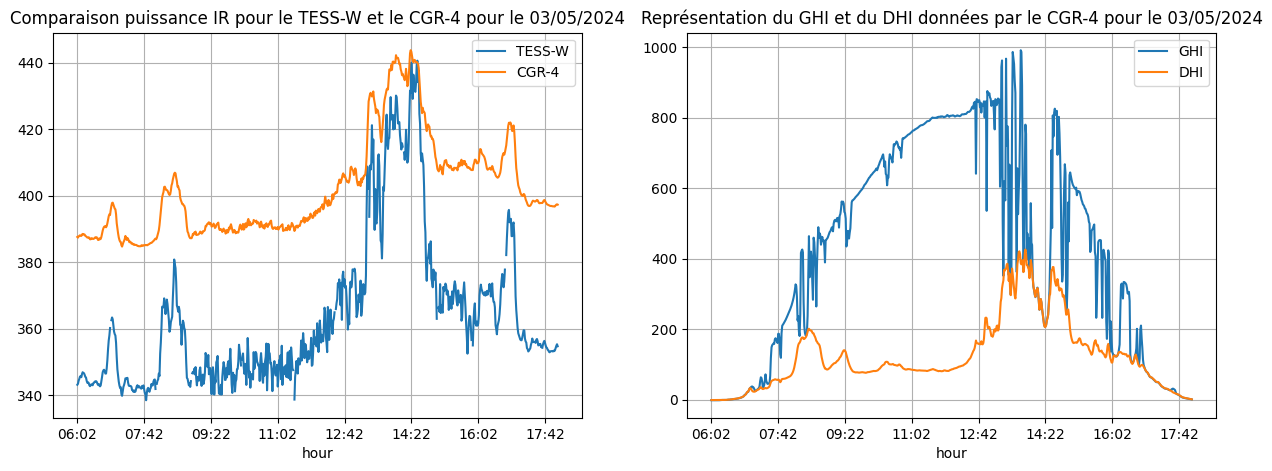

MAE : 38.05265598138942
RMSE : 39.12424966716587
MedAE: 41.222139844061076


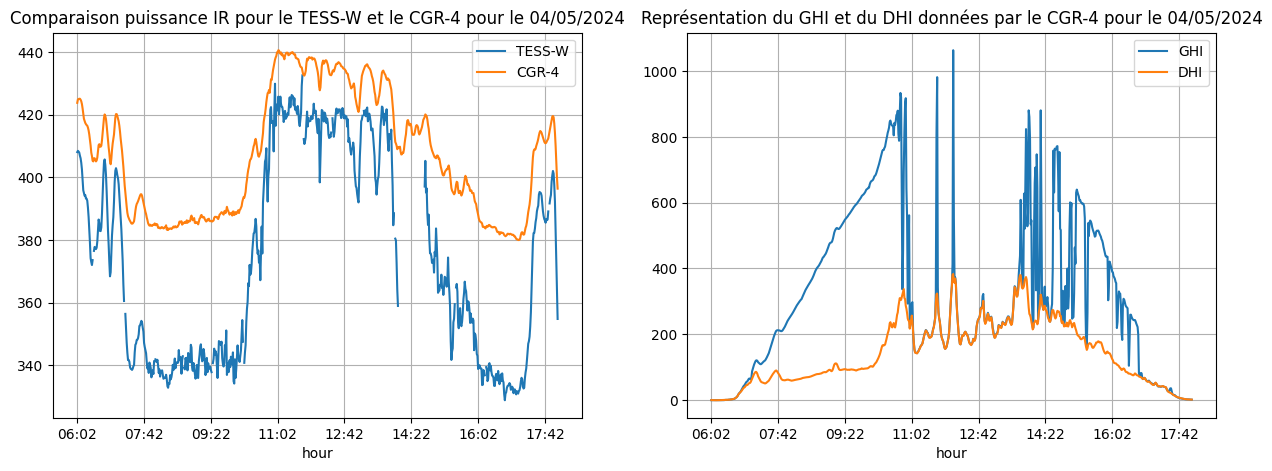

MAE : 33.80477091159151
RMSE : 36.11749693468775
MedAE: 37.329627328031734


In [18]:
fig, ax1 = plt.subplots(1,2)

P_tsky[362:1082].plot(ax=ax1[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 03/05/2024')
df['IR 1'][362:1082].plot(ax=ax1[0], label='CGR-4')

df['GHI'][362:1082].plot(ax=ax1[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 03/05/2024')
df['DHI'][362:1082].plot(ax=ax1[1])

ax1[0].legend()
ax1[0].grid()
ax1[1].legend()
ax1[1].grid()

plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082]))

#############################################################################
fig, ax2 = plt.subplots(1,2)

P_tsky2[362:1082].plot(ax=ax2[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 04/05/2024')
df2['IR 1'][362:1082].plot(ax=ax2[0], label='CGR-4')

df2['GHI'][362:1082].plot(ax=ax2[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 04/05/2024')
df2['DHI'][362:1082].plot(ax=ax2[1])

ax2[0].legend()
ax2[0].grid()
ax2[1].legend()
ax2[1].grid()
plt.show()

print('MAE :', mean_absolute_error((df2nan['IR 1'][362:1082]), P_tsky2nan[362:1082]))
print('RMSE :', np.sqrt(mean_squared_error((df2nan['IR 1'][362:1082]), P_tsky2nan[362:1082])))
print('MedAE:', median_absolute_error((df2nan['IR 1'][362:1082]), P_tsky2nan[362:1082]))

<h3> Déterminer présence de nuages pour la nuit du 03/05/2024 au 04/05/2024</h3>

In [19]:
df['day 03-04'] = pd.concat([df['day'], df2['day']], ignore_index=True)
# df['hour 03-04'] = pd.concat([df['hour'], df2['hour']])
# df['DateTime'] = pd.to_datetime(df['day 03-04'] + ' ' + df['hour 03-04'], dayfirst = True)
print(df['day 03-04'])
# DateTime = df.set_index(df['DateTime'], inplace=True)
# df['Tamb nuit 03-04'] = pd.concat([df['tamb nuit'], df2['tamb nuit']])
# df['Tamb nuit 03-04'].plot()

hour
00:00    NaN
00:01    NaN
00:02    NaN
00:03    NaN
00:04    NaN
        ... 
23:55    NaN
23:56    NaN
23:57    NaN
23:58    NaN
23:59    NaN
Name: day 03-04, Length: 1440, dtype: object


<Axes: xlabel='DateTime'>

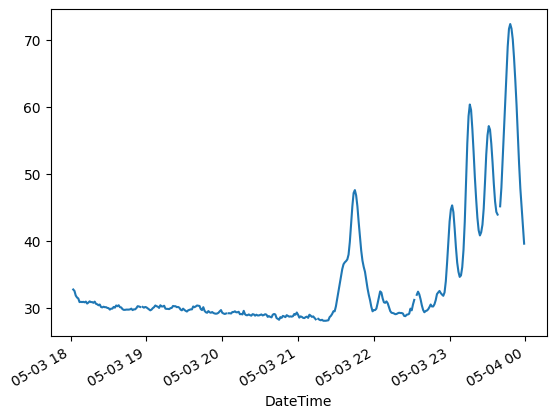

In [60]:
df_all = pd.concat([df, df2[1:1441]], ignore_index=True)
df_all['DateTime'] = pd.to_datetime(df_all['day'] + ' ' + df_all['hour'], dayfirst = True)
DateTime = df_all.set_index(df_all['DateTime'], inplace=True)

delta_T = df_all['tamb nuit'][1082:1832] - df_all['tsky nuit'][1082:1832]

Neb = 100 - (delta_T * 100)/(df_all['tamb nuit'][1082:1832].max()-df_all['tamb nuit'][1082:1832].min())
Neb.plot()